<a href="https://colab.research.google.com/github/TomMcIver/Skin-Cancer-U-Net/blob/main/Skin_Cancer_U_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!kaggle competitions download -c data-science-bowl-2018 -p /content --force


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


Downloaded dataset path: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1
Total images found: 2357


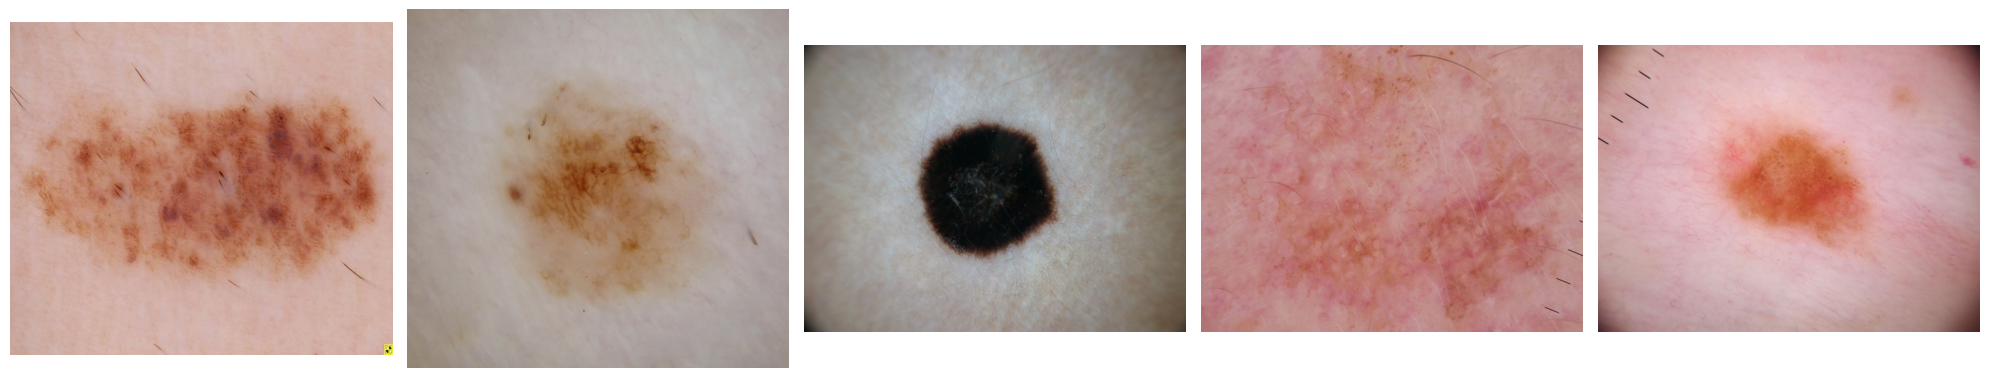

Dataset root path: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1

Directory: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1
  Subdirectories:
    - Skin cancer ISIC The International Skin Imaging Collaboration

Directory: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration
  Subdirectories:
    - Train
    - Test

Directory: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/Train
  Subdirectories:
    - nevus
    - dermatofibroma
    - melanoma
    - actinic keratosis
    - basal cell carcinoma
    - squamous cell carcinoma
    - pigmented benign keratosis
    - seborrheic keratosis
    - vascular lesion

Directory: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging

In [7]:

!pip install kagglehub --quiet

import kagglehub
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image


path = kagglehub.dataset_download("nodoubttome/skin-cancer9-classesisic")

# 2) Print out the exact path to verify
print("Downloaded dataset path:", path)

# gwt the first few image paths from sub folders
image_paths = glob.glob(os.path.join(path, "**", "*.jpg"), recursive=True)
image_paths += glob.glob(os.path.join(path, "**", "*.jpeg"), recursive=True)
image_paths += glob.glob(os.path.join(path, "**", "*.png"), recursive=True)

print(f"Total images found: {len(image_paths)}")

#  show the first few images as a sanity check
num_images_to_show = 5
fig, axes = plt.subplots(1, num_images_to_show, figsize=(20, 4))

for i, img_path in enumerate(image_paths[:num_images_to_show]):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

import os

# Print the root path
print("Dataset root path:", path)

#  print folder structure
for root, dirs, files in os.walk(path):
    print(f"\nDirectory: {root}")
    if dirs:
        print("  Subdirectories:")
        for d in dirs:
            print(f"    - {d}")




Class name -> index mapping: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


Loading vascular lesion: 100%|██████████| 139/139 [00:02<00:00, 53.81it/s]


X_train shape: (2239, 128, 128, 3)
y_train shape: (2239,)
Class name -> index mapping: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


Loading vascular lesion: 100%|██████████| 3/3 [00:00<00:00, 46.41it/s]


X_test shape: (118, 128, 128, 3)
y_test shape: (118,)


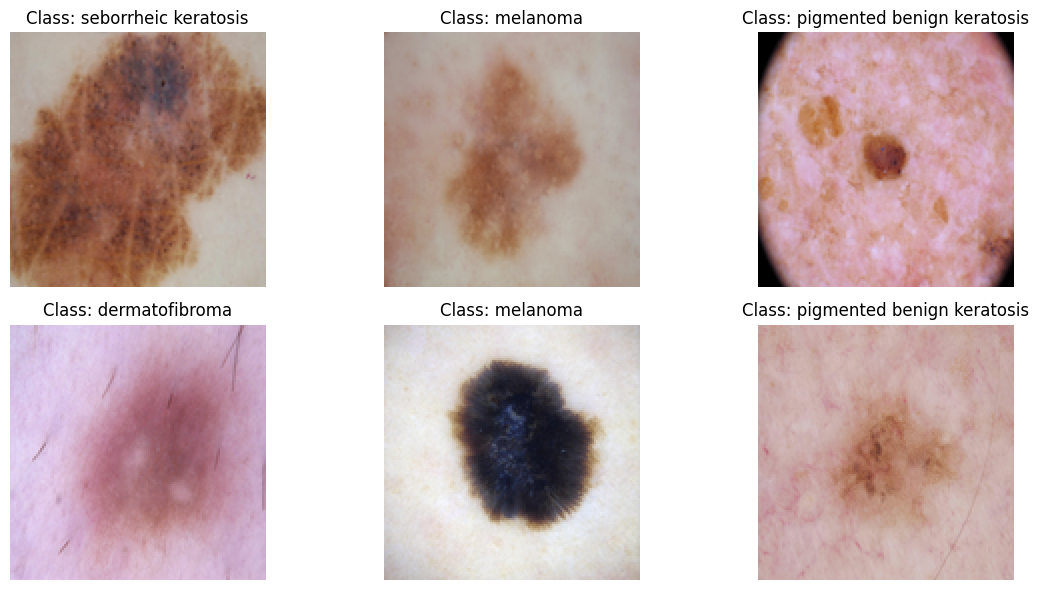

In [9]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm


train_dir = os.path.join(path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Train")
test_dir  = os.path.join(path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Test")


IMG_HEIGHT = 128
IMG_WIDTH = 128

#Helper function to load images and labels from a directory
def load_images_and_labels(root_folder):
    class_names = sorted(os.listdir(root_folder))
    X = []
    y = []
    class_to_idx = {c: i for i, c in enumerate(class_names)}
    print("Class name -> index mapping:", class_to_idx)

    for class_name in class_names:
        class_folder = os.path.join(root_folder, class_name)
        if os.path.isdir(class_folder):
            image_paths = glob.glob(os.path.join(class_folder, "*.jpg")) \
                        + glob.glob(os.path.join(class_folder, "*.jpeg")) \
                        + glob.glob(os.path.join(class_folder, "*.png"))

            for img_path in tqdm(image_paths, desc=f"Loading {class_name}"):
                img = Image.open(img_path).convert("RGB")


                img = img.resize((IMG_WIDTH, IMG_HEIGHT), resample=Image.Resampling.LANCZOS)
                img = np.array(img, dtype=np.float32) / 255.0

                X.append(img)
                y.append(class_to_idx[class_name])

    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.int32)

    return X, y, class_names



# Train Data
X_train, y_train, class_names = load_images_and_labels(train_dir)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Test Data
X_test, y_test, _ = load_images_and_labels(test_dir)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Quick sanity check of some training images
import random
n_samples_to_show = 6
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_show):
    idx = random.randint(0, len(X_train) - 1)
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[idx])
    label_idx = y_train[idx]
    plt.title(f"Class: {class_names[label_idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
